# 1. Importing necessari Library

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob


import warnings
warnings.filterwarnings('ignore')

# 2. Importing Data

In [99]:
data1 = pd.read_excel('Manual vs iMT vs AMT vs DCT vs CVT vs Automatic Transmissions - Which to buy_ - YouTube(1).xlsx')
data1

,Date,Comment,Likes,User Name,Unnamed: 4,Reply Count
0,2 years ago (edited),Planning to buy a new car & need guidance on w...,291,MotorOctane,NaN,62.0
1,1 year ago,no one would be able to explain all these tran...,1500,rasikraj jangale,NaN,0.0
2,10 months ago,I find IMT more interesting bcos you don't hav...,71,Sufiyan Sheikh,NaN,0.0
3,1 year ago,This was very helpful! You can also add timest...,99,Vasu Agarwal,NaN,0.0
4,2 years ago,Wow!!! I am damn sure no one could have explai...,17,Chiranjeet Giri,NaN,0.0
...,...,...,...,...,...,...
1183,1 year ago,Aree totle,0,CRYPTONITE,NaN,2.0
1184,1 month ago,nnnnnnnnging,0,Tom Ocean,NaN,NaN
1185,1 year ago (edited),My God absolute garbage in explaining the job...,0,Shobin p,NaN,NaN
1186,1 year ago,JESUS IS LIVING GOD\nHE IS COMING SOON...\nREP...,0,Calix,NaN,0.0


# 3. Data Analysis

In [100]:
del data1['Unnamed: 4']

In [103]:
data1.head(17)

,Date,Comment,Likes,User Name,Reply Count
0,2 years ago (edited),Planning to buy a new car & need guidance on w...,291,MotorOctane,62.0
1,1 year ago,no one would be able to explain all these tran...,1500,rasikraj jangale,0.0
2,10 months ago,I find IMT more interesting bcos you don't hav...,71,Sufiyan Sheikh,0.0
3,1 year ago,This was very helpful! You can also add timest...,99,Vasu Agarwal,0.0
4,2 years ago,Wow!!! I am damn sure no one could have explai...,17,Chiranjeet Giri,0.0
5,1 month ago,"Automatic is just like a remote car, where you...",1,Abddul Rahman 1857,0.0
6,2 years ago,Nice comparison ! Would like to see a video on...,8,Alankar Das,0.0
7,1 year ago,You explained literally everything we need and...,34,Rahul Bicholkar,0.0
8,1 year ago,IMT seems pretty decent. No clutch plus u get ...,46,Shut da hell up,0.0
9,2 days ago,Felt like I was talking face to face with a pr...,0,Kash Yeptho55555,0.0


In [6]:
data1['Comment'] = data1['Comment'].fillna('na')
data1['Reply Count'] = data1['Reply Count'].fillna(0)
data1.isna().sum()

Date           0
Comment        0
Likes          0
User Name      0
Reply Count    0
dtype: int64

In [7]:
data1.shape

(1188, 5)

In [8]:
data1.dtypes

Date            object
Comment         object
Likes            int64
User Name       object
Reply Count    float64
dtype: object

In [11]:
data1['Reply Count'].round(1)
data1.head()

,Date,Comment,Likes,User Name,Reply Count
0,2 years ago (edited),Planning to buy a new car & need guidance on w...,291,MotorOctane,62.0
1,1 year ago,no one would be able to explain all these tran...,1500,rasikraj jangale,0.0
2,10 months ago,I find IMT more interesting bcos you don't hav...,71,Sufiyan Sheikh,0.0
3,1 year ago,This was very helpful! You can also add timest...,99,Vasu Agarwal,0.0
4,2 years ago,Wow!!! I am damn sure no one could have explai...,17,Chiranjeet Giri,0.0


# 4. Data Pre-Processing

## 4.1 Converting to Lower Case 

In [12]:
data1['Comment'] = data1['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data1['Comment'].head()

0    planning to buy a new car & need guidance on w...
1    no one would be able to explain all these tran...
2    i find imt more interesting bcos you don't hav...
3    this was very helpful! you can also add timest...
4    wow!!! i am damn sure no one could have explai...
Name: Comment, dtype: object

## 4.2 Removing Punctuations

In [13]:
data1['hastags'] = data1['Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data1[['Comment','hastags']].head()

,Comment,hastags
0,planning to buy a new car & need guidance on w...,0
1,no one would be able to explain all these tran...,0
2,i find imt more interesting bcos you don't hav...,0
3,this was very helpful! you can also add timest...,0
4,wow!!! i am damn sure no one could have explai...,0


In [14]:
data1['hastags'].value_counts()

0    1187
1       1
Name: hastags, dtype: int64

In [15]:
data1['Comment'] = data1['Comment'].str.replace('[^\w\s]','')
data1['Comment'].head()

0    planning to buy a new car  need guidance on wh...
1    no one would be able to explain all these tran...
2    i find imt more interesting bcos you dont have...
3    this was very helpful you can also add timesta...
4    wow i am damn sure no one could have explained...
Name: Comment, dtype: object

## 4.3 Removing Stop words

In [16]:
stop = stopwords.words('english')

data1['stopwords'] = data1['Comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
data1[['Comment','stopwords']].head()

,Comment,stopwords
0,planning to buy a new car need guidance on wh...,8
1,no one would be able to explain all these tran...,7
2,i find imt more interesting bcos you dont have...,18
3,this was very helpful you can also add timesta...,11
4,wow i am damn sure no one could have explained...,20


In [17]:
stop = stopwords.words('english')
data1['Comment'] = data1['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data1['Comment'].head()

0    planning buy new car need guidance buy connect...
1    one would able explain transmissions easier la...
2    find imt interesting bcos dont deal irritating...
3    helpful also add timestamps itll make easier n...
4    wow damn sure one could explained us great box...
Name: Comment, dtype: object

## 4.4 Spelling Correction

In [18]:
data1['Comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    planning buy new car need guidance buy connect...
1    one would able explain transmission easier lan...
2    find it interesting cos dont deal irritating c...
3    helpful also add timestamps till make easier n...
4    now damn sure one could explained us great box...
Name: Comment, dtype: object

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joins\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading : Package '' not found in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 4.5 Tokenization

In [20]:
tokenized_comment = data1['Comment'].apply(lambda x: x.split())
tokenized_comment.head()

0    [planning, buy, new, car, need, guidance, buy,...
1    [one, would, able, explain, transmissions, eas...
2    [find, imt, interesting, bcos, dont, deal, irr...
3    [helpful, also, add, timestamps, itll, make, e...
4    [wow, damn, sure, one, could, explained, us, g...
Name: Comment, dtype: object

## 4.6 Stemming

In [21]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data1['Comment'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    plan buy new car need guidanc buy connect us h...
1    one would abl explain transmiss easier languag...
2    find imt interest bco dont deal irrit clutch e...
3    help also add timestamp itll make easier navig...
4    wow damn sure one could explain us great box w...
Name: Comment, dtype: object

## 4.7 Lemmatization

In [22]:
from textblob import Word

In [23]:
data1['Comment'] = data1['Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data1['Comment'].head()

0    planning buy new car need guidance buy connect...
1    one would able explain transmission easier lan...
2    find imt interesting bcos dont deal irritating...
3    helpful also add timestamps itll make easier n...
4    wow damn sure one could explained u great box ...
Name: Comment, dtype: object

# 5.Comment Analysis

## 5.1 Word Count

In [24]:
data1['word_count'] = data1['Comment'].apply(lambda x: len(str(x).split(" ")))
data1[['Comment','word_count']].head()

,Comment,word_count
0,planning buy new car need guidance buy connect...,17
1,one would able explain transmission easier lan...,10
2,find imt interesting bcos dont deal irritating...,18
3,helpful also add timestamps itll make easier n...,14
4,wow damn sure one could explained u great box ...,26


In [25]:
maxclm = data1.max()['word_count']
print("Maximum word in the comments are: ")
print(maxclm)

minclm = data1.min()['word_count']
print('Minimum words in the comments are: ')
print(minclm)

Maximum word in the comments are: 
156
Minimum words in the comments are: 
1


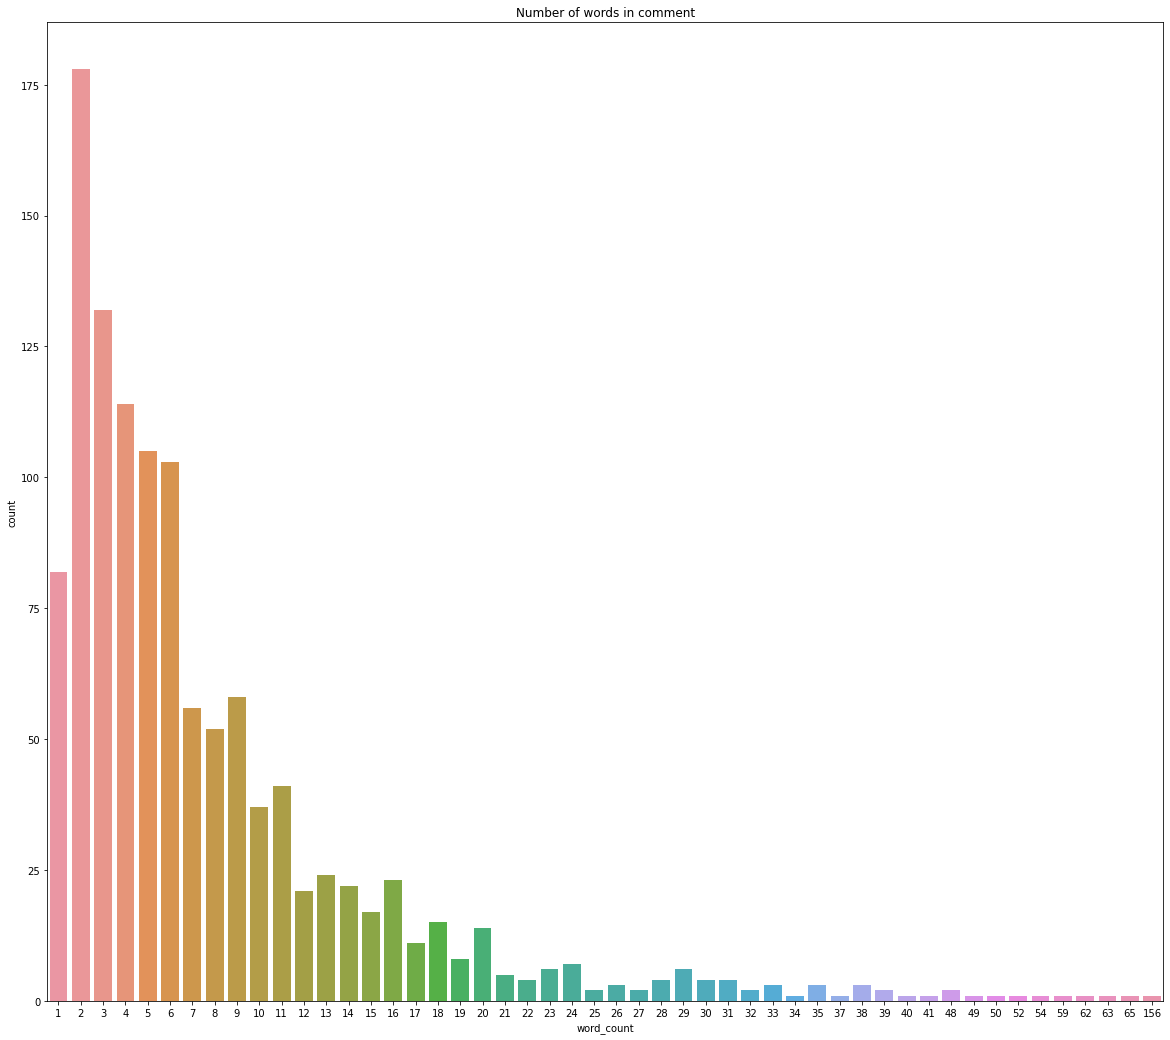

In [26]:
plt.figure(figsize=(20,18))
sns.countplot( x='word_count', y=None, data = data1,)
plt.title('Number of words in comment')
plt.show()

## 5.2 Reply Count

In [27]:
maxreply = data1.max()['Reply Count']
print("Maximum reply for a comment is: ")
print(maxreply)

Maximum reply for a comment is: 
62.0


In [28]:
maxreply3 = data1.nlargest(2,['Reply Count'])
maxreply3

,Date,Comment,Likes,User Name,Reply Count,hastags,stopwords,word_count
0,2 years ago (edited),planning buy new car need guidance buy connect...,291,MotorOctane,62.0,0,8,17
655,1 year ago,think cvt best,0,lakshay Vats,19.0,0,2,3


In [29]:
data1['Reply Count'].value_counts()

0.0     1110
1.0       51
2.0       14
3.0        3
5.0        3
62.0       1
8.0        1
19.0       1
14.0       1
6.0        1
9.0        1
4.0        1
Name: Reply Count, dtype: int64

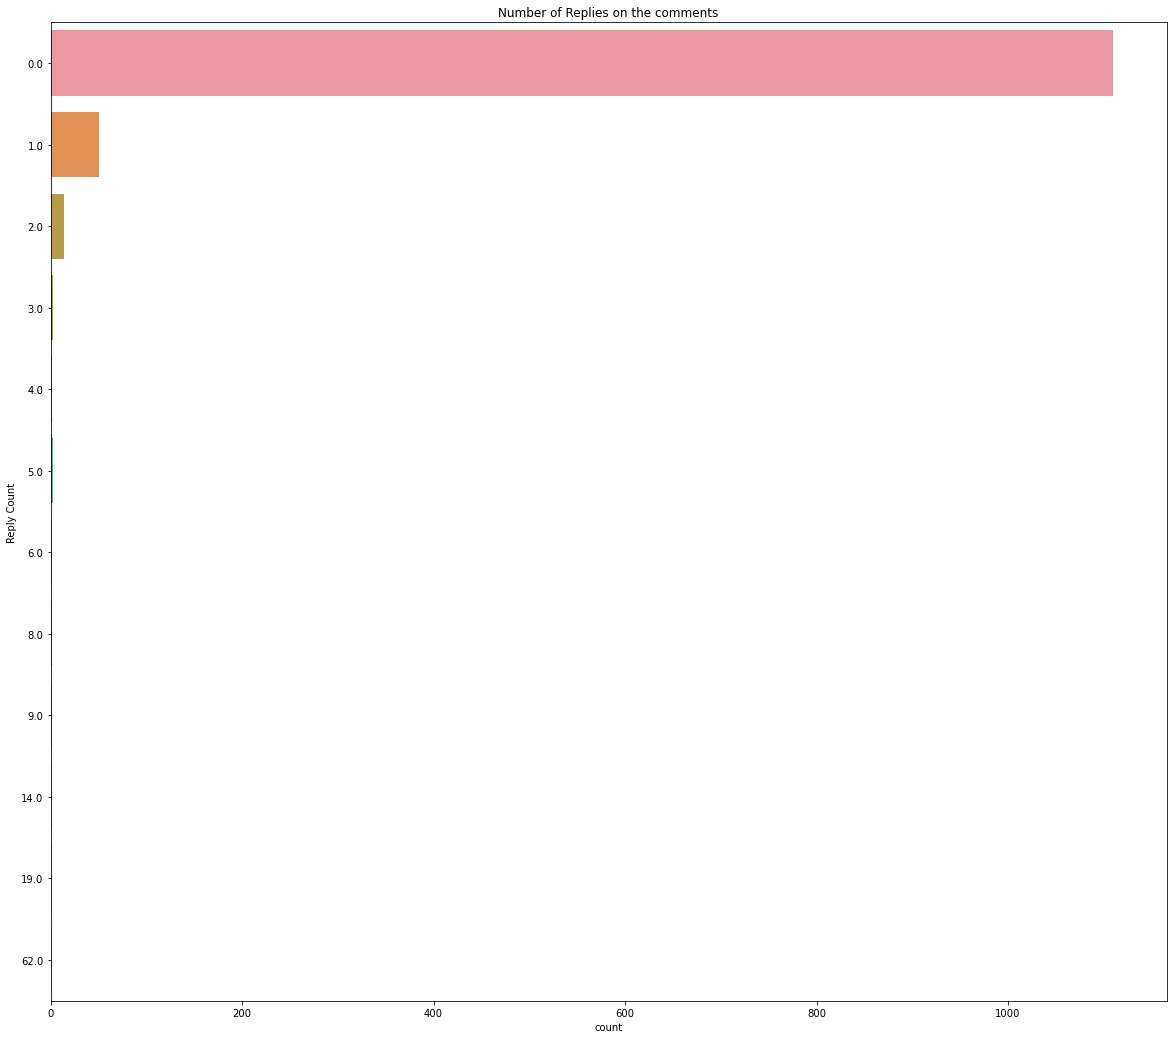

In [30]:
plt.figure(figsize=(20,18))
sns.countplot(x=None, y='Reply Count', data = data1)
plt.title('Number of Replies on the comments')
plt.show()

## 5.3 Likes Analysis

In [31]:
maxlikes = data1.max()['Likes']
print('Maximum number of likes on a comment: ')
print(maxlikes)

Maximum number of likes on a comment: 
1500


In [32]:
maxreply2 = data1.query('Likes == Likes.max()')
maxreply2

,Date,Comment,Likes,User Name,Reply Count,hastags,stopwords,word_count
1,1 year ago,one would able explain transmission easier lan...,1500,rasikraj jangale,0.0,0,7,10


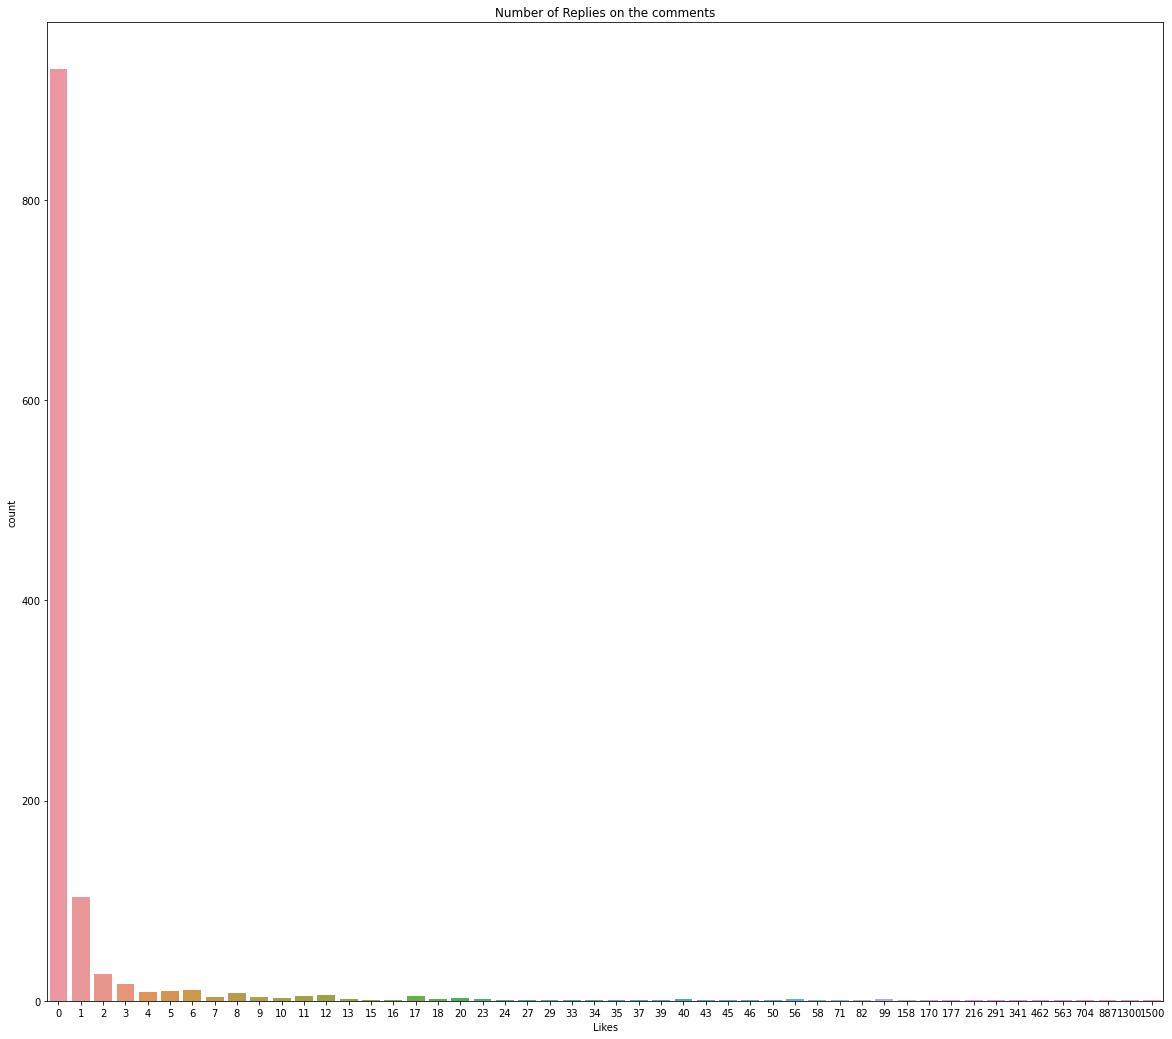

In [33]:
plt.figure(figsize=(20,18))
sns.countplot(x='Likes', y=None, data = data1)
plt.title('Number of Replies on the comments')
plt.show()

## 5.4 Most Common Word Used

In [34]:
freq = pd.Series(' '.join(data1['Comment']).split()).value_counts()[:10]
freq = pd.DataFrame(data=freq)
freq.columns =['Frequency']
freq.reset_index(inplace = True)
freq.rename(columns = {'index':'words'},inplace = True)
freq

,words,Frequency
0,manual,248
1,car,170
2,transmission,165
3,imt,154
4,video,149
5,best,130
6,automatic,129
7,good,109
8,gear,102
9,cvt,98


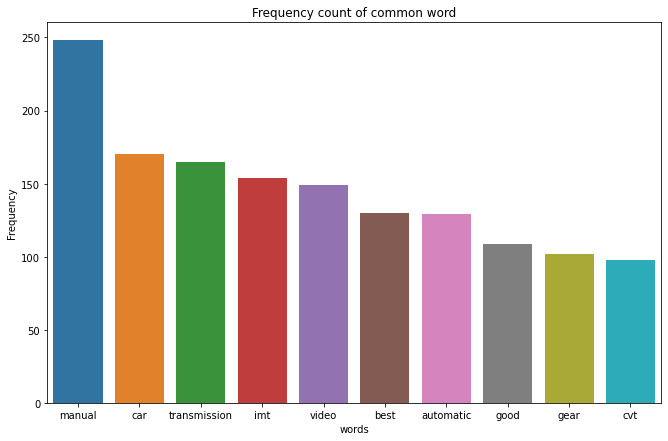

In [35]:
plt.figure(figsize=(11,7))
sns.barplot(x='words',y='Frequency', data=freq)
plt.title('Frequency count of common word')
plt.show()

In [36]:
import numpy as np

# 6. TF-IDF Analysis

In [37]:
tf1 = (data1['Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,one,1
1,would,1
2,able,1
3,explain,1
4,transmission,1
5,easier,1
6,language,1
7,thiswell,1
8,done,1
9,bro,1


In [38]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data1.shape[0]/(len(data1[data1['Comment'].str.contains(word)])))
tf1

,words,tf,idf
0,one,1,2.558238
1,would,1,4.246813
2,able,1,3.168003
3,explain,1,2.397895
4,transmission,1,2.227996
5,easier,1,6.386879
6,language,1,4.440969
7,thiswell,1,7.080026
8,done,1,4.084294
9,bro,1,2.698000


In [39]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,one,1,2.558238,2.558238
1,would,1,4.246813,4.246813
2,able,1,3.168003,3.168003
3,explain,1,2.397895,2.397895
4,transmission,1,2.227996,2.227996
5,easier,1,6.386879,6.386879
6,language,1,4.440969,4.440969
7,thiswell,1,7.080026,7.080026
8,done,1,4.084294,4.084294
9,bro,1,2.698000,2.698000


# 7. SENTIMENTAL ANALYSIS

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [41]:
data1['sentiment Score'] = data1['Comment'].apply(lambda x: TextBlob(x).sentiment[0] )
data1[['Comment','sentiment Score']].head()

,Comment,sentiment Score
0,planning buy new car need guidance buy connect...,0.136364
1,one would able explain transmission easier lan...,0.500000
2,find imt interesting bcos dont deal irritating...,0.100000
3,helpful also add timestamps itll make easier n...,0.214286
4,wow damn sure one could explained u great box ...,0.398611


In [42]:
data1['Sentiment'] = data1['sentiment Score'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
data1[['Comment','sentiment Score','Sentiment']].head()

,Comment,sentiment Score,Sentiment
0,planning buy new car need guidance buy connect...,0.136364,Positive
1,one would able explain transmission easier lan...,0.500000,Positive
2,find imt interesting bcos dont deal irritating...,0.100000,Positive
3,helpful also add timestamps itll make easier n...,0.214286,Positive
4,wow damn sure one could explained u great box ...,0.398611,Positive


In [43]:
data1.Sentiment.value_counts()

Positive    686
Neutral     434
Negative     68
Name: Sentiment, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
data1['Sentiment'] = le.fit_transform(data1['Sentiment'])

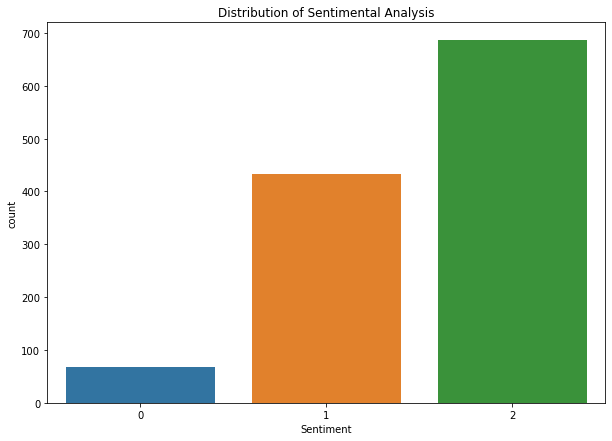

In [46]:
plt.figure(figsize=(10,7))
sns.countplot( x='Sentiment', y=None, data = data1)
plt.title('Distribution of Sentimental Analysis')
plt.show()

# 8. Visualization

## 8.1 WORD CLOUD FOR MOST POPULAR WORDS

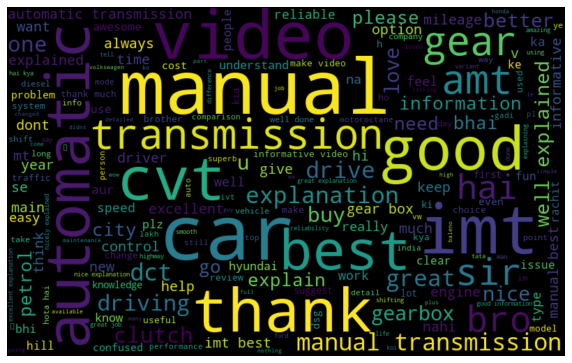

In [47]:
all_words = ' '.join([text for text in data1['Comment']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [52]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 8.2 MOST COMMON STOP WORD

In [53]:
corpus=[]
new = data1['Comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [54]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

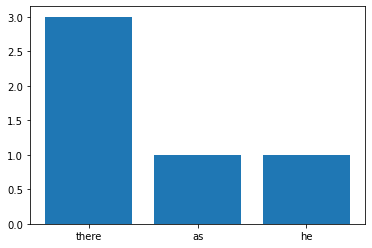

In [55]:
plot_top_stopwords_barchart(data1['Comment'])

In [59]:
from collections import  Counter

## 8.3 MOST COMMON NON STOP WORD

In [60]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

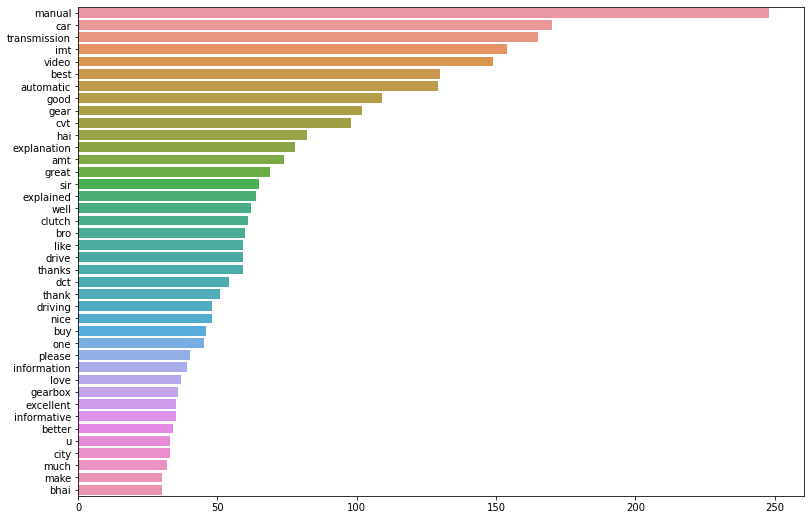

In [65]:
plt.figure(figsize=(13,9))
plot_top_non_stopwords_barchart(data1['Comment'])

# 9. N-GRAM EXPLORATION

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

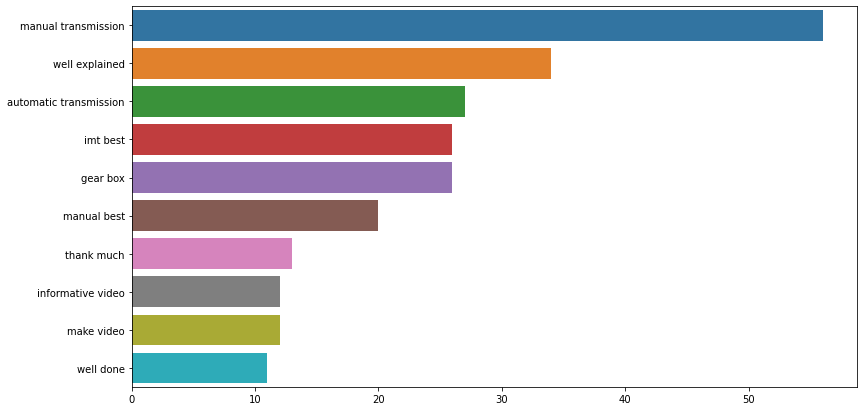

In [68]:
plt.figure(figsize=(13,7))
plot_top_ngrams_barchart(data1['Comment'],2)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joins\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

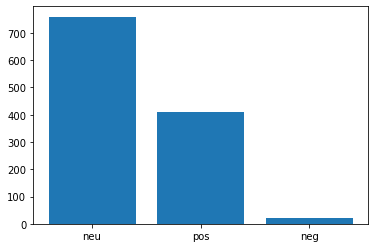

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    ss = sid.polarity_scores(sent)
    return np.argmax(list(ss.values())[:-1])
data1['polarity']=data1['Comment'].\
    map(lambda x: get_vader_score(x))
polarity=data1['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# 10. NAMED ENTITY RECOGNITION

In [74]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [75]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'), ('Iran', 'GPE'), ('Chabahar', 'GPE'), ('Thursday', 'DATE')]

In [76]:
from spacy import displacy

displacy.render(doc, style='ent')

In [77]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=data1['Comment'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

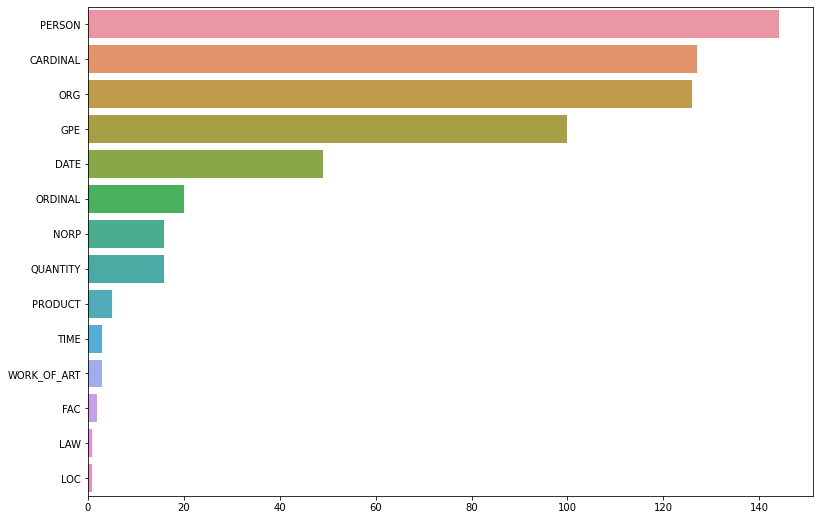

In [79]:
plt.figure(figsize=(13,9))
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
plt.show()

### NER AS PER GPE

<AxesSubplot:>

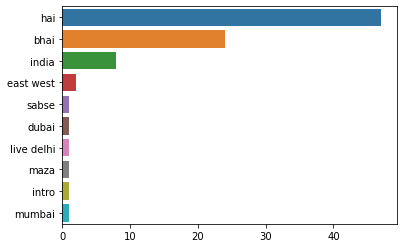

In [80]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=data1['Comment'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

### NEP AS PER PERSON

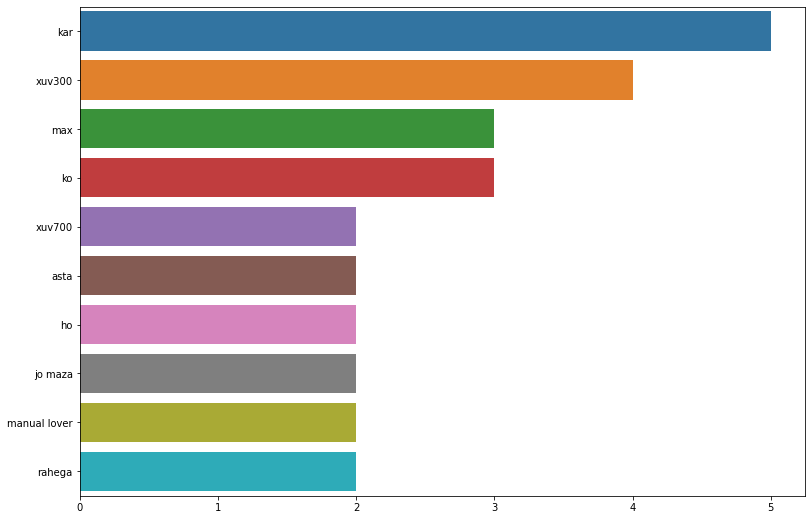

In [82]:
per=data1['Comment'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

plt.figure(figsize=(13,9))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)
plt.show()

In [86]:
import nltk
nltk.download('averaged_perceptron_tagger')
sentence="The greatest comeback stories in 2019"
tokens = word_tokenize(sentence)
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joins\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [87]:
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# 11. Exploring through text complexity

In [95]:
pip install textstat

  Using cached textstat-0.7.3-py3-none-any.whl (105 kB)
  Using cached pyphen-0.13.0-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


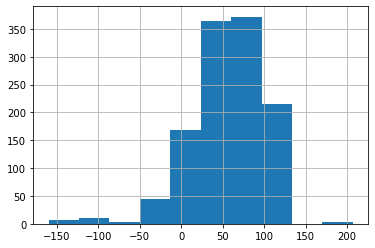

<Figure size 936x648 with 0 Axes>

In [97]:
from textstat import flesch_reading_ease

data1['Comment'].\
   apply(lambda x : flesch_reading_ease(x)).hist()
plt.figure(figsize=(13,9))
plt.show()